### Importing Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [53]:
df = pd.read_csv('BlackFriday.csv')

In [54]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [55]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
96439,1002937,P00002542,F,18-25,4,A,4+,0,8,14.0,NaN,4127
327173,1002346,P00048142,F,0-17,10,A,1,0,1,16.0,NaN,8091
51115,1001812,P00018042,F,26-35,12,A,4+,1,15,16.0,NaN,17344
404741,1002207,P00332242,M,18-25,4,C,4+,0,1,16.0,NaN,15696
293098,1003224,P00043542,F,26-35,14,A,3,1,8,NaN,NaN,7951


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [57]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [58]:
df.fillna(0,inplace=True)

In [59]:
#Display unique elements in each column
for col in df.columns:
    print('{} unique elements: {}'.format(col,df[col].nunique()))

User_ID unique elements: 5891
Product_ID unique elements: 3623
Gender unique elements: 2
Age unique elements: 7
Occupation unique elements: 21
City_Category unique elements: 3
Stay_In_Current_City_Years unique elements: 5
Marital_Status unique elements: 2
Product_Category_1 unique elements: 18
Product_Category_2 unique elements: 18
Product_Category_3 unique elements: 16
Purchase unique elements: 17959


## Data Visualization

#### Purchase distribution

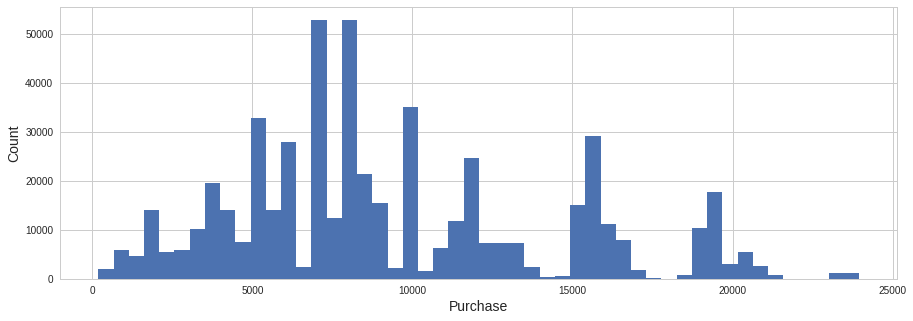

In [60]:
plt.figure(figsize=(15,5))
plt.hist(df['Purchase'],bins=50)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)


#### Distributions of `User_ID` and `Product_ID`

([], <a list of 0 Text xticklabel objects>)

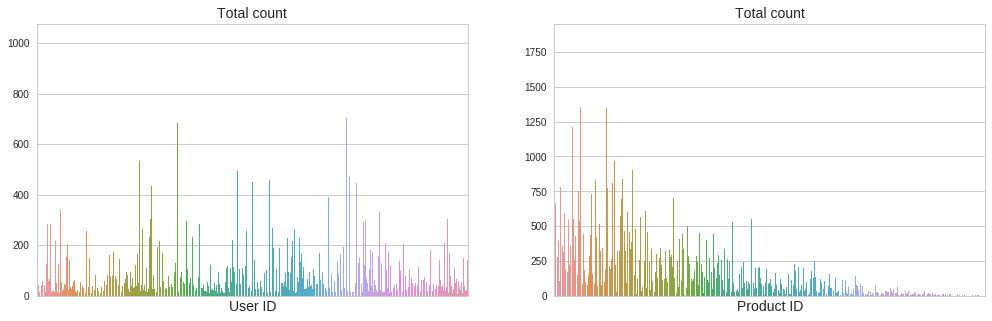

In [10]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.countplot('User_ID',data=df)
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])
plt.subplot(1,2,2)
sns.countplot('Product_ID',data=df)
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])

####  Count/Purchase by Age by Gender

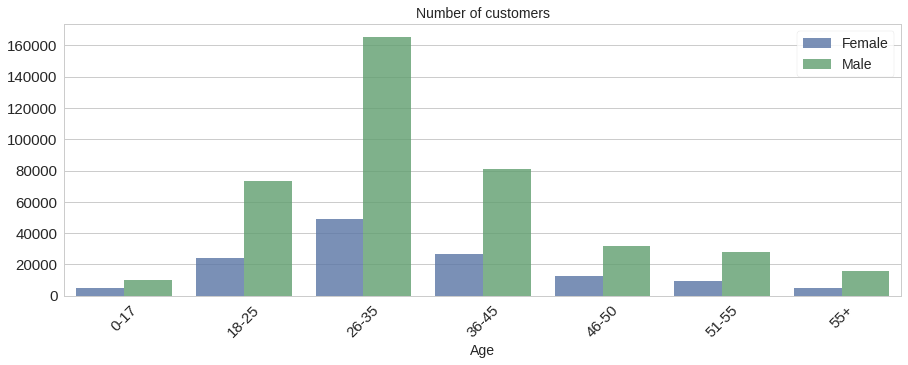

In [20]:
plt.figure(figsize=(15,5))
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)

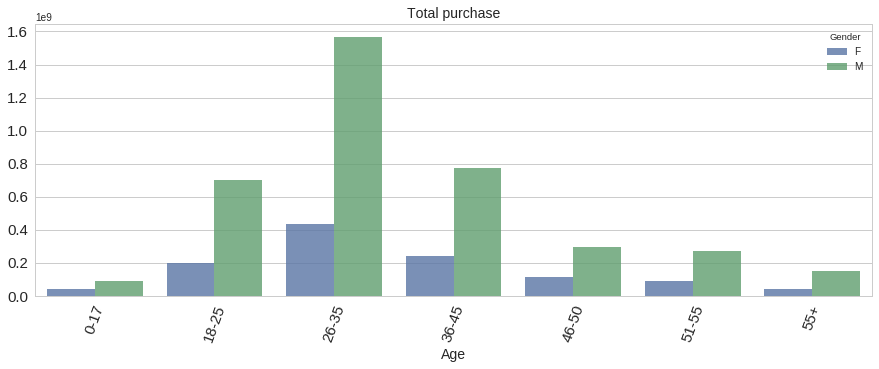

In [49]:
plt.figure(figsize=(15,5))
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.tick_params(labelsize=15)

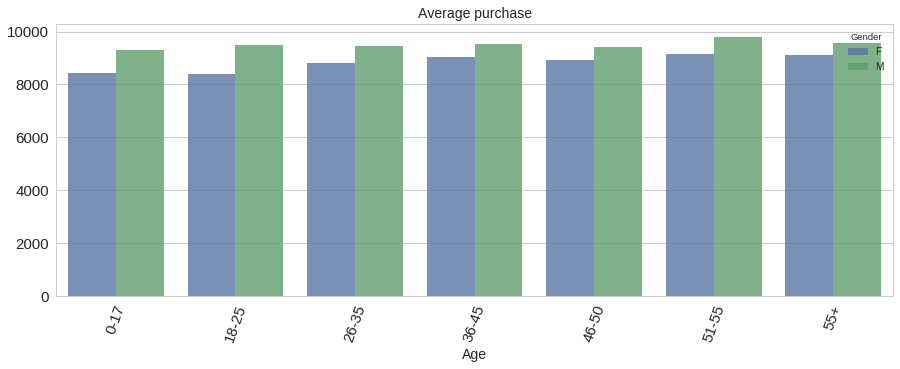

In [21]:
plt.figure(figsize=(15,5))
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.tick_params(labelsize=15)

####  Count/Purchase by City by Occupation

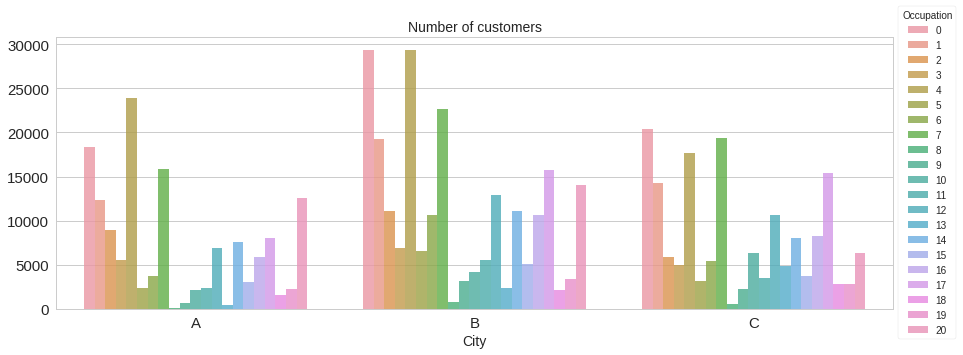

In [22]:
city_order = ['A','B','C']
plt.figure(figsize=(15,5))
sns.countplot('City_Category',order=city_order,hue='Occupation',data=df,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Number of customers',fontsize=14)

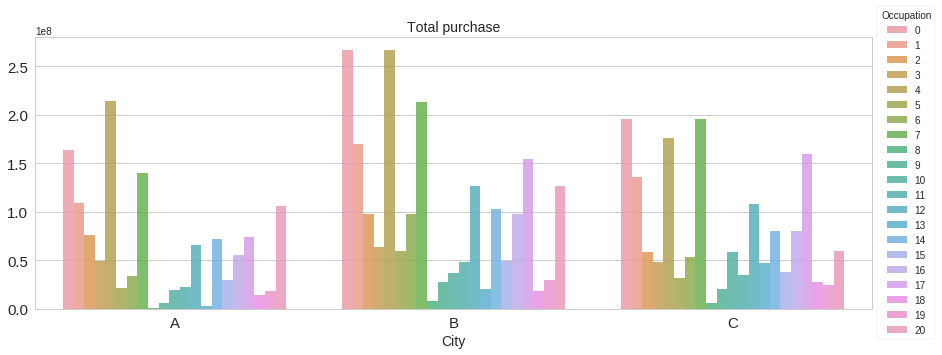

In [23]:
plt.figure(figsize=(15,5))
df_Tpurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)

####  Purchase by City by Marrital status and Residency duration

In [49]:
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')

In [50]:
df['Marital_Status_label'].sample(5)

256217    Married
56559      Single
210183     Single
398450    Married
463320     Single
Name: Marital_Status_label, dtype: object

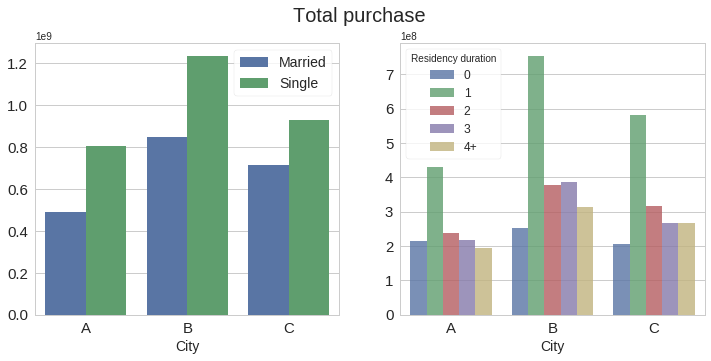

In [51]:
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

In [31]:
df_Tpurchase_by_PC1_Gender = df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()

In [32]:
df_Tpurchase_by_PC1_Gender.head()

,Product_Category_1,Gender,Purchase
0,1,0,331792660
1,1,1,1550873665
2,2,0,63581729
3,2,1,200915513
4,3,0,60278495


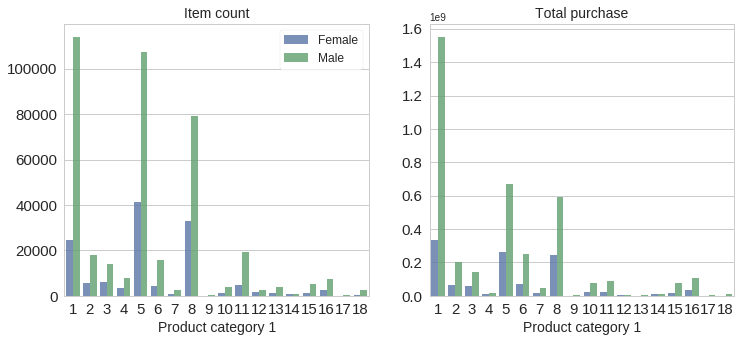

In [17]:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

### Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder
le_U_ID = LabelEncoder()
df['User_ID'] = le_U_ID.fit_transform(df['User_ID'])
le_P_ID = LabelEncoder()
df['Product_ID'] = le_P_ID.fit_transform(df['Product_ID'])
df['Gender'] = np.where(df['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(df.Age)
df_CC = pd.get_dummies(df.City_Category)
df_SIC = pd.get_dummies(df.Stay_In_Current_City_Years)
df_encoded = pd.concat([df,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_frac = df_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
pred = reg.predict(X_test_scaled)

In [68]:
r2_score(pred, y_test)

0.41580011787977644

### HyperParameter Tuning for RandomForestRegressor

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='r2').fit(X_train_scaled,y_train)
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((grid_rf.best_score_)))

Best parameter: {'n_estimators': 300}
Best score: 0.64


In [62]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='r2').fit(X_train_scaled,y_train)

In [63]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((grid_rf.best_score_)))

Best parameter: {'max_depth': 7, 'n_estimators': 300}
Best score: 0.64


### Fitting RandomForestRegressor

In [64]:
reg = RandomForestRegressor(n_estimators=300,max_depth=7)
reg.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [65]:
predd = reg.predict(X_test_scaled)

### Best score

In [66]:
r2_score(y_test,predd)

0.6368290865606777